Import Library

In [27]:
import pandas as pd

Preprocessing Data

In [28]:
surabaya_house_data = pd.read_csv('C:/HousePricePrediction/Data/Combined_Datalist.csv', sep=';')

# Display the first few rows of the dataset
surabaya_house_data.head()

,Kecamatan,URL,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,ID Iklan
0,wonokromo,https://www.rumah123.com/properti/surabaya/hos...,600.000.000,3,2,45,70,SHM - Sertifikat Hak Milik,1300,Tidak,Tidak,Unfurnished,2,Barat,Tidak,NaN,NaN,Tidak,Baru,hos10785157
1,rungkut,https://www.rumah123.com/properti/surabaya/hos...,600.000.000,3,2,48,2023,SHM - Sertifikat Hak Milik,1300,Ya,Ya,Unfurnished,2,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru,hos14967398
2,semampir,https://www.rumah123.com/properti/surabaya/hos...,600.000.000,3,3,48,85,SHM - Sertifikat Hak Milik,1300,Ya,Ya,Unfurnished,3,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,hos14975276
3,pakal,https://www.rumah123.com/properti/surabaya/hos...,600.000.000,2,1,50,91,HGB - Hak Guna Bangunan,1300,Ya,Ya,Unfurnished,1,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru,hos11538329
4,gayungan,https://www.rumah123.com/properti/surabaya/hos...,600.000.000,2,2,51,50,SHM - Sertifikat Hak Milik,2200,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru,hos14770370


In [29]:
surabaya_house_data.drop(columns=['URL'], inplace=True)
surabaya_house_data.drop(columns=['ID Iklan'], inplace=True)

In [30]:
surabaya_house_data.head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600.000.000,3,2,45,70,SHM - Sertifikat Hak Milik,1300,Tidak,Tidak,Unfurnished,2,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600.000.000,3,2,48,2023,SHM - Sertifikat Hak Milik,1300,Ya,Ya,Unfurnished,2,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600.000.000,3,3,48,85,SHM - Sertifikat Hak Milik,1300,Ya,Ya,Unfurnished,3,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600.000.000,2,1,50,91,HGB - Hak Guna Bangunan,1300,Ya,Ya,Unfurnished,1,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600.000.000,2,2,51,50,SHM - Sertifikat Hak Milik,2200,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru


In [31]:
# Cleaning the name of the column
surabaya_house_data.columns = surabaya_house_data.columns.str.strip()
surabaya_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kecamatan            8986 non-null   object
 1   Price                8984 non-null   object
 2   Kamar Tidur          8984 non-null   object
 3   Kamar Mandi          8984 non-null   object
 4   Luas Tanah           8985 non-null   object
 5   Luas Bangunan        8985 non-null   object
 6   Sertifikat           8982 non-null   object
 7   Daya Listrik         6818 non-null   object
 8   Ruang Makan          6620 non-null   object
 9   Ruang Tamu           8416 non-null   object
 10  Kondisi Perabotan    8982 non-null   object
 11  Jumlah Lantai        8944 non-null   object
 12  Hadap                5853 non-null   object
 13  Terjangkau Internet  8418 non-null   object
 14  Lebar Jalan          4595 non-null   object
 15  Sumber Air           5963 non-null   object
 16  Hook  

In [32]:
selected_columns_categorical_to_numeric = [
    'Price',
    'Luas Tanah',
    'Luas Bangunan',
    'Kamar Tidur',
    'Kamar Mandi',
    'Jumlah Lantai',
    'Daya Listrik'
]

surabaya_house_data['Price'] = surabaya_house_data['Price'].astype(str).str.replace(r'[^\d]', '', regex=True)

# Converted selected columns to numeric
for column in selected_columns_categorical_to_numeric:
    surabaya_house_data[column] = pd.to_numeric(surabaya_house_data[column], errors='coerce')

surabaya_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            8986 non-null   object 
 1   Price                8984 non-null   float64
 2   Kamar Tidur          8983 non-null   float64
 3   Kamar Mandi          8983 non-null   float64
 4   Luas Tanah           8984 non-null   float64
 5   Luas Bangunan        8984 non-null   float64
 6   Sertifikat           8982 non-null   object 
 7   Daya Listrik         6817 non-null   float64
 8   Ruang Makan          6620 non-null   object 
 9   Ruang Tamu           8416 non-null   object 
 10  Kondisi Perabotan    8982 non-null   object 
 11  Jumlah Lantai        8943 non-null   float64
 12  Hadap                5853 non-null   object 
 13  Terjangkau Internet  8418 non-null   object 
 14  Lebar Jalan          4595 non-null   object 
 15  Sumber Air           5963 non-null   o

In [33]:
surabaya_house_data['Kecamatan'].unique()

array(['wonokromo', 'rungkut', 'semampir', 'pakal', 'gayungan',
       'tambaksari', 'benowo', 'sambikerep', 'lakarsantri', 'tandes',
       'tenggilis mejoyo', 'wiyung', 'sawahan', 'tegalsari', 'sukolilo',
       'asemrowo', 'gubeng', 'mulyorejo', 'kenjeran', 'krembangan',
       'sukomanunggal', 'bubutan', 'jambangan', 'dukuh pakis',
       'simokerto', 'wonocolo', 'genteng', nan, 'Jumlah Data Ksong',
       'Persentase', 'Jumlah Data', 'Median', 'Mean', 'Modus'],
      dtype=object)

In [34]:
surabaya_house_data['Price'].unique()

array([6.00000000e+08, 6.07000000e+08, 6.15000000e+08, 6.20000000e+08,
       6.25000000e+08, 6.30000000e+08, 6.35000000e+08, 6.40000000e+08,
       6.45000000e+08, 6.50000000e+08, 6.55000000e+08, 6.70000000e+08,
       6.75000000e+08, 6.80000000e+08, 6.82000000e+08, 6.83000000e+08,
       6.85000000e+08, 6.90000000e+08, 6.97000000e+08, 6.98000000e+08,
       6.99000000e+08, 7.00000000e+08, 7.14000000e+08, 7.15000000e+08,
       7.20000000e+08, 7.25000000e+08, 7.27000000e+08, 7.30000000e+08,
       7.35000000e+08, 7.40000000e+08, 7.45000000e+08, 7.50000000e+08,
       7.60000000e+08, 7.65000000e+08, 7.70000000e+08, 7.75000000e+08,
       7.80000000e+08, 7.83000000e+08, 7.85000000e+08, 7.90000000e+08,
       7.95000000e+08, 7.97000000e+08, 7.99000000e+08, 8.00000000e+08,
       8.05000000e+08, 8.10000000e+08, 8.15000000e+08, 8.17000000e+08,
       8.25000000e+08, 8.26000000e+08, 8.30000000e+08, 8.33000000e+08,
       8.35000000e+08, 8.40000000e+08, 8.49000000e+08, 8.50000000e+08,
      

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

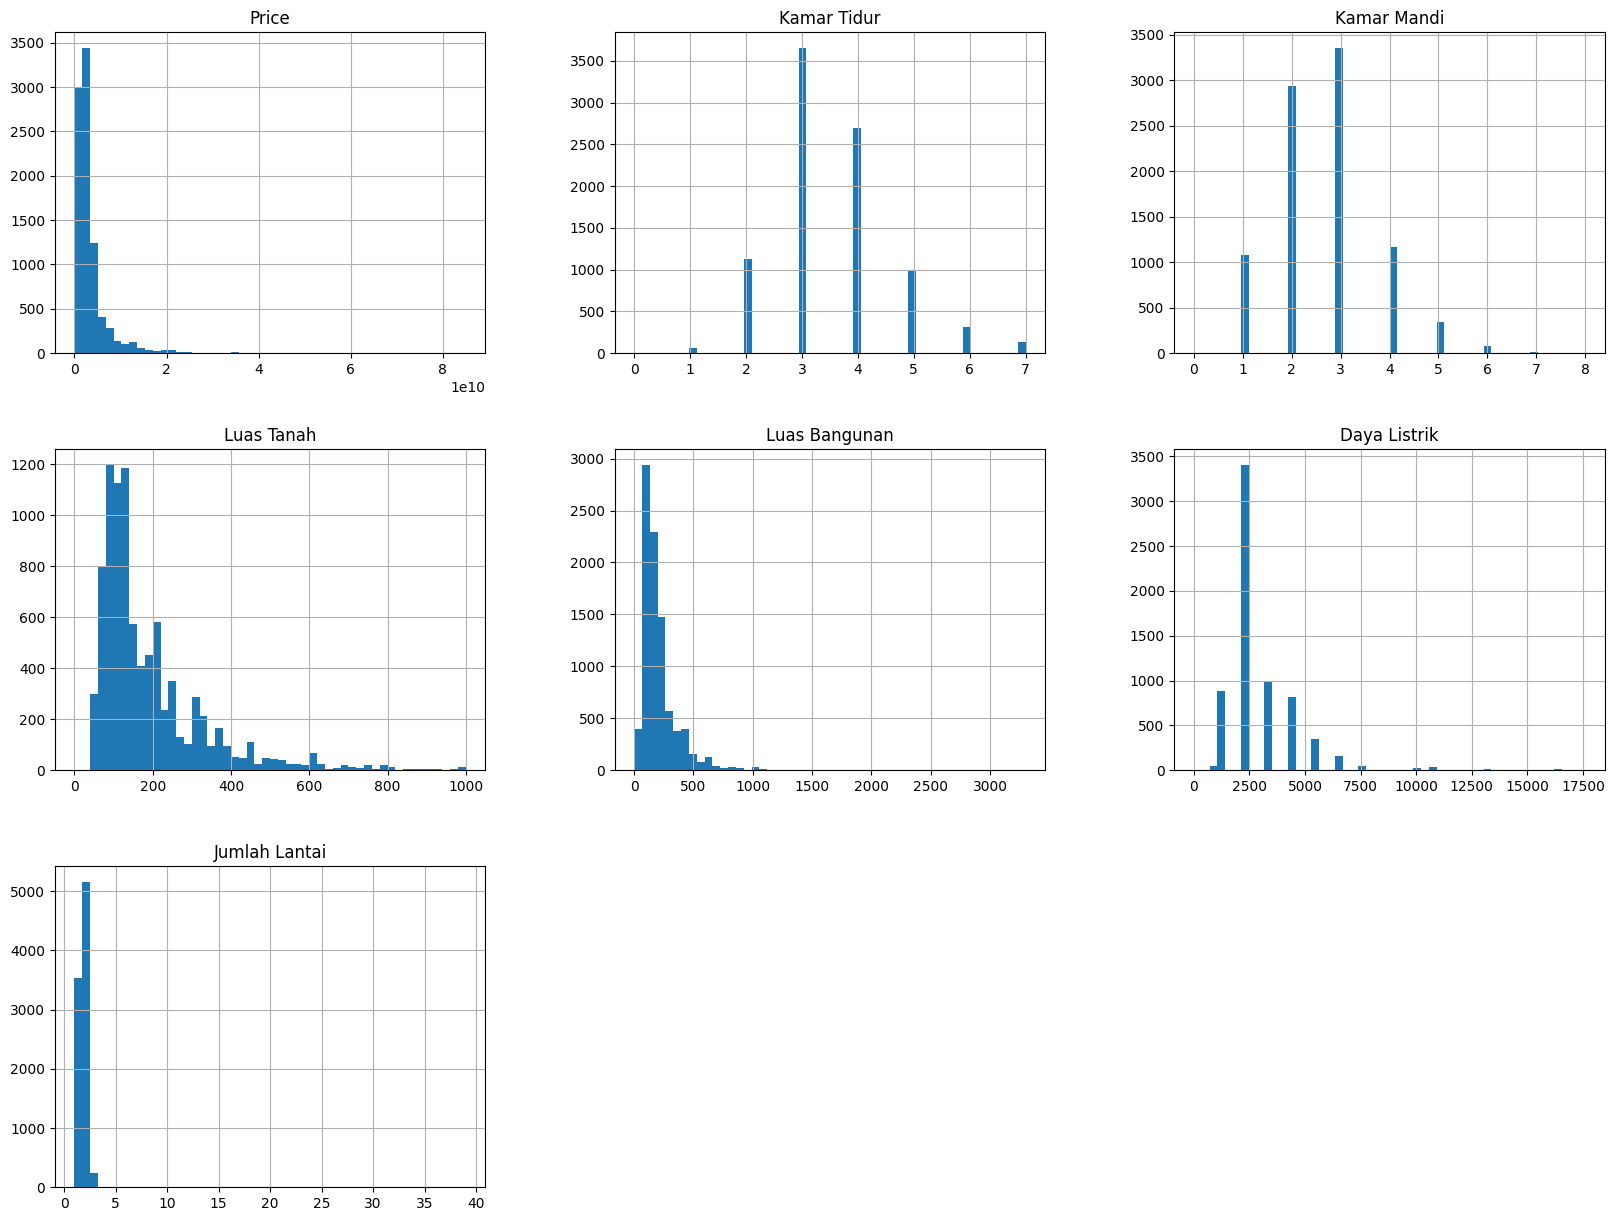

In [36]:
surabaya_house_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [37]:
# Handling missing values
# Mengisi kolom numerik dengan nilai rata-rata karena nilai yang hilang tidak terlalu banyak
selected_column_numeric_filledmean = ['Price', 'Kamar Tidur', 'Kamar Mandi', 'Jumlah Lantai', 'Luas Tanah', 'Luas Bangunan']

# Mengisi kolom kategorikal dengan modus karena nilai yang hilang tidak terlalu banyak
selected_column_categorical_filledmode = ['Kecamatan', 'Sertifikat', 'Kondisi Perabotan', 'Terjangkau Internet', 'Hook', 'Kondisi Properti']

# Menghapus kolom lebar jalan karena terlalu banyak nilai yang hilang dan jika diisi dengan median
# mean atau modus akan menghasilkan bias yang sangat besar
surabaya_house_data.drop(columns=['Lebar Jalan'], inplace=True)

# mengisi nilai yang hilang pada kolom Daya Listrik dengan median
surabaya_house_data['Daya Listrik'] = surabaya_house_data['Daya Listrik'].fillna(surabaya_house_data['Daya Listrik'].median())

# mengisi nilai yang hilang pada kolom Ruang Makan, hadap, dan Sumber air dengan modus
surabaya_house_data['Ruang Makan'] = surabaya_house_data['Ruang Makan'].fillna(surabaya_house_data['Ruang Makan'].mode()[0])
surabaya_house_data['Ruang Tamu'] = surabaya_house_data['Ruang Tamu'].fillna(surabaya_house_data['Ruang Tamu'].mode()[0])
surabaya_house_data['Hadap'] = surabaya_house_data['Hadap'].fillna(surabaya_house_data['Hadap'].mode()[0])
surabaya_house_data['Sumber Air'] = surabaya_house_data['Sumber Air'].fillna(surabaya_house_data['Sumber Air'].mode()[0])

# mengisi nilai yang hilang pada kolom Price, Kamar Tidur, Kamar Mandi, Jumlah Lantai, Luas Tanah, Luas Bangunan dengan mean
for column in selected_column_numeric_filledmean:
    surabaya_house_data[column] = surabaya_house_data[column].fillna(surabaya_house_data[column].mean())
print('Proses mengisi nilai missing value selesai')

# mengisi nilai yang hilang pada kolom Kecamatan, Sertifikat, Kondisi perabotan, Terjangkau Internet, Hook, dan Kondisi properti dengan modus
for columns in selected_column_categorical_filledmode:
    surabaya_house_data[columns] = surabaya_house_data[columns].fillna(surabaya_house_data[columns].mode()[0])
print('Proses mengisi nilai missing value selesai')

Proses mengisi nilai missing value selesai
Proses mengisi nilai missing value selesai


In [38]:
surabaya_house_data.isnull().sum()

Kecamatan              0
Price                  0
Kamar Tidur            0
Kamar Mandi            0
Luas Tanah             0
Luas Bangunan          0
Sertifikat             0
Daya Listrik           0
Ruang Makan            0
Ruang Tamu             0
Kondisi Perabotan      0
Jumlah Lantai          0
Hadap                  0
Terjangkau Internet    0
Sumber Air             0
Hook                   0
Kondisi Properti       0
dtype: int64

In [39]:
surabaya_house_data['Kecamatan'].unique()

array(['wonokromo', 'rungkut', 'semampir', 'pakal', 'gayungan',
       'tambaksari', 'benowo', 'sambikerep', 'lakarsantri', 'tandes',
       'tenggilis mejoyo', 'wiyung', 'sawahan', 'tegalsari', 'sukolilo',
       'asemrowo', 'gubeng', 'mulyorejo', 'kenjeran', 'krembangan',
       'sukomanunggal', 'bubutan', 'jambangan', 'dukuh pakis',
       'simokerto', 'wonocolo', 'genteng', 'Jumlah Data Ksong',
       'Persentase', 'Jumlah Data', 'Median', 'Mean', 'Modus'],
      dtype=object)

In [40]:
surabaya_house_data['Sertifikat'].unique()

array(['SHM - Sertifikat Hak Milik', 'HGB - Hak Guna Bangunan',
       'Lainnya (PPJB,Girik,Adat,dll)', 'HP - Hak Pakai', '0', '0,00%'],
      dtype=object)

In [41]:
kolom_kategorik = ['Kecamatan', 'Sertifikat', 'Ruang Makan', 'Ruang Tamu', 'Kondisi Perabotan', 'Hadap', 'Terjangkau Internet', 'Sumber Air', 'Hook', 'Kondisi Properti']

for col in kolom_kategorik:
  print(surabaya_house_data[col].unique())

['wonokromo' 'rungkut' 'semampir' 'pakal' 'gayungan' 'tambaksari' 'benowo'
 'sambikerep' 'lakarsantri' 'tandes' 'tenggilis mejoyo' 'wiyung' 'sawahan'
 'tegalsari' 'sukolilo' 'asemrowo' 'gubeng' 'mulyorejo' 'kenjeran'
 'krembangan' 'sukomanunggal' 'bubutan' 'jambangan' 'dukuh pakis'
 'simokerto' 'wonocolo' 'genteng' 'Jumlah Data Ksong' 'Persentase'
 'Jumlah Data' 'Median' 'Mean' 'Modus']
['SHM - Sertifikat Hak Milik' 'HGB - Hak Guna Bangunan'
 'Lainnya (PPJB,Girik,Adat,dll)' 'HP - Hak Pakai' '0' '0,00%']
['Tidak' 'Ya' '2362' '26,30%']
['Tidak' 'Ya' '566' '6,30%']
['Unfurnished' 'Semi Furnished' '0' '0,00%']
['Barat' 'Selatan' 'Utara' 'Timur' 'Tenggara' 'Timur Laut' 'Barat Daya'
 'Barat Laut' '3129' '34,84%']
['Tidak' 'Ya' '564' '6,28%']
['PAM atau PDAM' 'Sumur Pompa' 'Sumur Bor' 'Sumur Resapan' 'Sumur Galian'
 '3019' '33,62%']
['Tidak' 'Ya' '564' '6,28%']
['Baru' 'Bagus' 'Sudah Renovasi' 'Butuh Renovasi' 'Bagus Sekali'
 'Unfurnished' '380' '4,23%']


In [42]:
keywords_to_remove = [
'Jumlah Data Ksong', 'Persentase',
 'Jumlah Data', 'Median', 'Mean', 'Modus',
 '0', '0,00%', '2362', '26,30%', '566', '6,30%',
 '3129', '34,84%', '564', '6,28%', '3019', '33,62%',
 '564', '6,28%', '380', '4,23%'
]

# Fungsi untuk cek apakah baris mengandung salah satu kata kunci
def contains_keyword(row, keywords):
    return any(str(val).lower() in keywords for val in row.values)

# Buat mask: True jika baris TIDAK mengandung keyword
mask = ~surabaya_house_data.apply(lambda row: contains_keyword(row, keywords_to_remove), axis=1)

# Filter DataFrame
surabaya_house_data = surabaya_house_data[mask]


In [43]:
kolom_kategorik = ['Kecamatan', 'Sertifikat', 'Ruang Makan', 'Ruang Tamu', 'Kondisi Perabotan', 'Hadap', 'Terjangkau Internet', 'Sumber Air', 'Hook', 'Kondisi Properti']

for col in kolom_kategorik:
  print(surabaya_house_data[col].unique())

['wonokromo' 'rungkut' 'semampir' 'pakal' 'gayungan' 'tambaksari' 'benowo'
 'sambikerep' 'lakarsantri' 'tandes' 'tenggilis mejoyo' 'wiyung' 'sawahan'
 'tegalsari' 'sukolilo' 'asemrowo' 'gubeng' 'mulyorejo' 'kenjeran'
 'krembangan' 'sukomanunggal' 'bubutan' 'jambangan' 'dukuh pakis'
 'simokerto' 'wonocolo' 'genteng' 'Jumlah Data' 'Median' 'Mean' 'Modus']
['SHM - Sertifikat Hak Milik' 'HGB - Hak Guna Bangunan'
 'Lainnya (PPJB,Girik,Adat,dll)' 'HP - Hak Pakai']
['Tidak' 'Ya']
['Tidak' 'Ya']
['Unfurnished' 'Semi Furnished']
['Barat' 'Selatan' 'Utara' 'Timur' 'Tenggara' 'Timur Laut' 'Barat Daya'
 'Barat Laut']
['Tidak' 'Ya']
['PAM atau PDAM' 'Sumur Pompa' 'Sumur Bor' 'Sumur Resapan' 'Sumur Galian']
['Tidak' 'Ya']
['Baru' 'Bagus' 'Sudah Renovasi' 'Butuh Renovasi' 'Bagus Sekali'
 'Unfurnished']


EDA

In [44]:
surabaya_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8985 entries, 0 to 8986
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            8985 non-null   object 
 1   Price                8985 non-null   float64
 2   Kamar Tidur          8985 non-null   float64
 3   Kamar Mandi          8985 non-null   float64
 4   Luas Tanah           8985 non-null   float64
 5   Luas Bangunan        8985 non-null   float64
 6   Sertifikat           8985 non-null   object 
 7   Daya Listrik         8985 non-null   float64
 8   Ruang Makan          8985 non-null   object 
 9   Ruang Tamu           8985 non-null   object 
 10  Kondisi Perabotan    8985 non-null   object 
 11  Jumlah Lantai        8985 non-null   float64
 12  Hadap                8985 non-null   object 
 13  Terjangkau Internet  8985 non-null   object 
 14  Sumber Air           8985 non-null   object 
 15  Hook                 8985 non-null   object

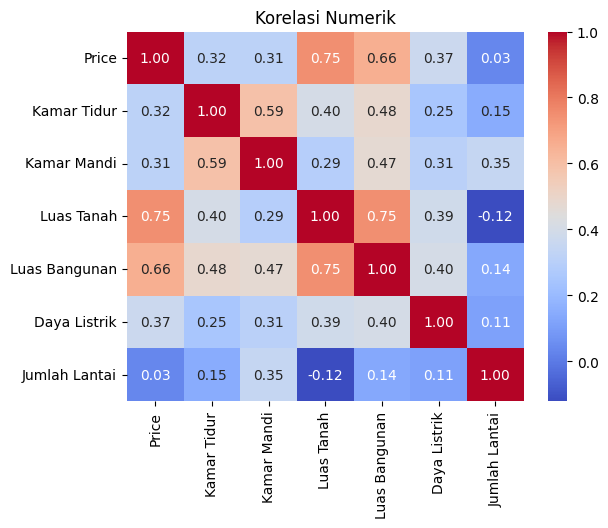

In [45]:
korelasi_numerik = surabaya_house_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(korelasi_numerik, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Numerik')
plt.show()

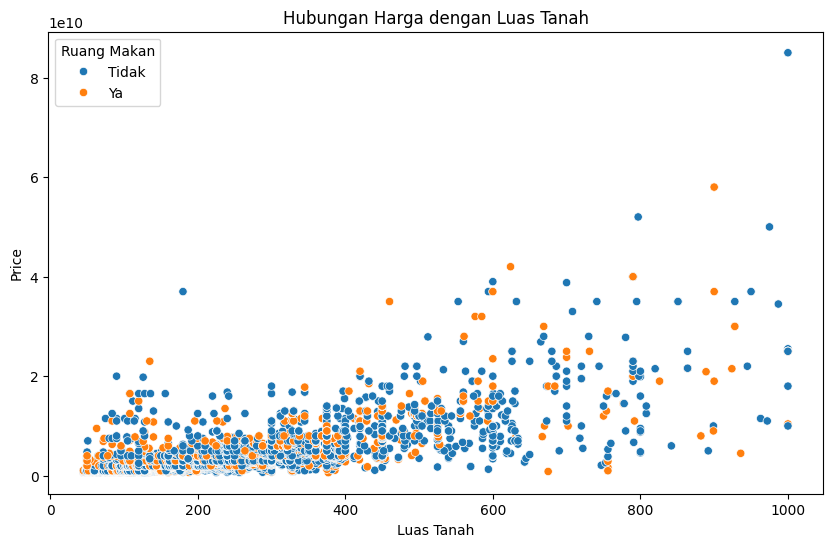

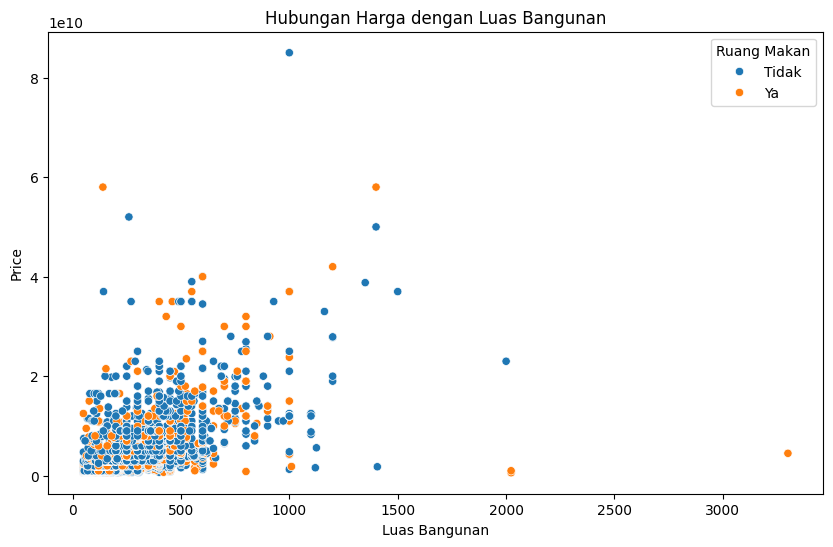

In [46]:
column_luas = ['Luas Tanah', 'Luas Bangunan']

for kolom in column_luas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=kolom, y='Price', hue='Ruang Makan', data=surabaya_house_data)
    plt.title(f'Hubungan Harga dengan {kolom}')
    plt.show()

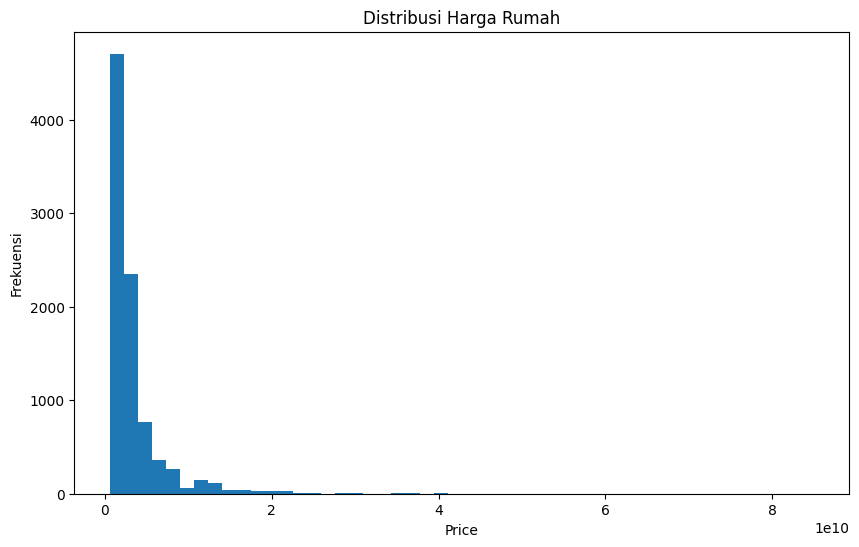

In [47]:
surabaya_house_data['Price'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.show()

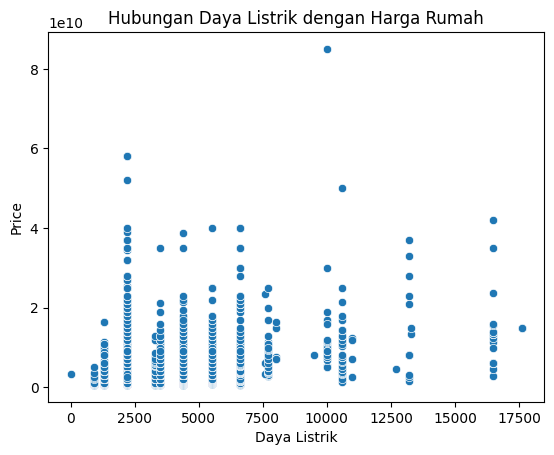

In [48]:
sns.scatterplot(data=surabaya_house_data, x = 'Daya Listrik', y = 'Price')
plt.title('Hubungan Daya Listrik dengan Harga Rumah')
plt.show()

Uji Anova untuk melihat fitur kategorik yang memiliki pengaruh yang signifikan